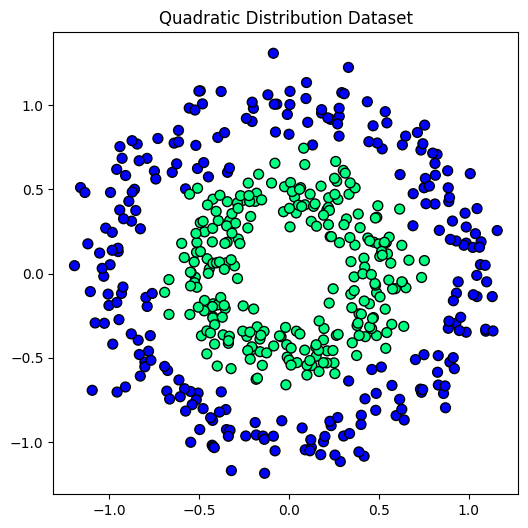

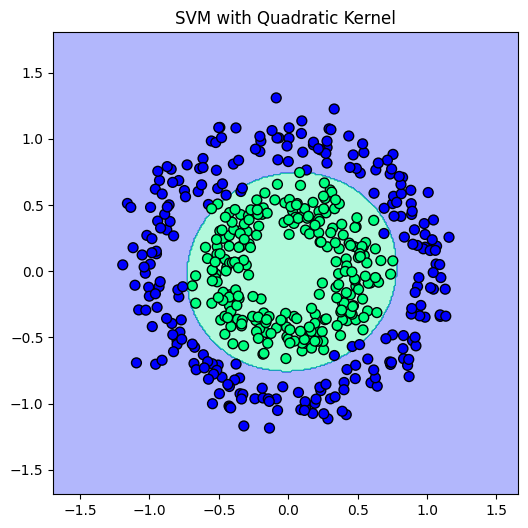

In [1]:
# SVM on a Quadratic Dataset

# 1️⃣ Import libraries
from sklearn.datasets import make_circles
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# 2️⃣ Generate dataset with a circular/quadratic pattern
X_quad, y_quad = make_circles(
    n_samples=500, factor=0.5, noise=0.1, random_state=42
)

# 3️⃣ Plot the dataset
plt.figure(figsize=(6,6))
plt.scatter(X_quad[:, 0], X_quad[:, 1], c=y_quad, cmap='winter', edgecolors='k', s=50)
plt.title("Quadratic Distribution Dataset")
plt.show()

# 4️⃣ Train polynomial kernel SVM
# Using pipeline: PolynomialFeatures -> StandardScaler -> Linear SVC
model_poly = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    SVC(kernel='linear')
)
model_poly.fit(X_quad, y_quad)

# 5️⃣ Plot decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='winter')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='winter', s=50)
    plt.title("SVM with Quadratic Kernel")
    plt.show()

plot_decision_boundary(model_poly, X_quad, y_quad)
